### 加载自定义数据

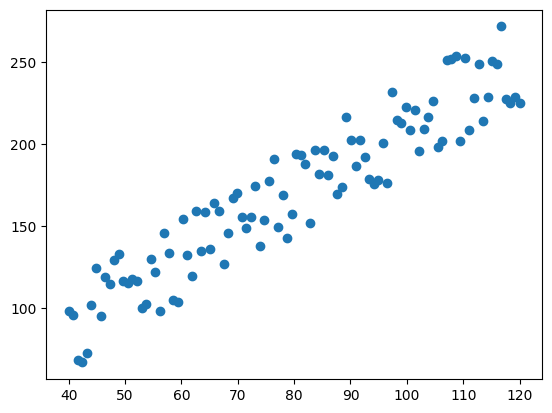

In [2]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
file_name = "ch05.npz"
def TargetFunction(x1):
    w1,b = 2,10
    return w1*x1+ b

def CreateSampleData(m):
    X = np.linspace(40,120,m).reshape(m,1)
    Y = TargetFunction(X)
    Noise = np.random.randint(1,60,(m,1)) - 30
    Y = Y + Noise
    return X, Y
    
X,Y = CreateSampleData(100)
plt.scatter(X,Y)

In [6]:
import pandas as pd
X = X.reshape(100)
Y = Y.reshape(100)
data = {'X':X , 'Y':Y}
df = pd.DataFrame(data)
df.to_csv('data/myData/data_1d.csv', index=False)
df

,X,Y
0,40.000000,98.000000
1,40.808081,95.616162
2,41.616162,68.232323
3,42.424242,66.848485
4,43.232323,72.464646
...,...,...
95,116.767677,271.535354
96,117.575758,227.151515
97,118.383838,224.767677
98,119.191919,228.383838


In [2]:
import pandas as pd
test = pd.read_csv("data/myData/data_1d.csv")

### 创建自定义数据集

In [3]:
import os
from torchvision.io import read_image
from torch.utils.data import Dataset

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, transform=None, target_transform=None):
        self.data = pd.read_csv(annotations_file)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        X = self.data.iloc[idx,0]
        Y = self.data.iloc[idx,1]
        if self.transform:
            X = self.transform(X)
        if self.target_transform:
            Y = self.target_transform(Y)
        return X, Y

### 准备数据以使用 DataLoaders 进行训练

In [4]:
from torch.utils.data import DataLoader

training_data = CustomImageDataset("data/myData/data_1d.csv")
train_dataloader = DataLoader(training_data, batch_size=30, shuffle=True)

### 遍历 DataLoader

Feature batch shape: torch.Size([30])
Labels batch shape: torch.Size([30])


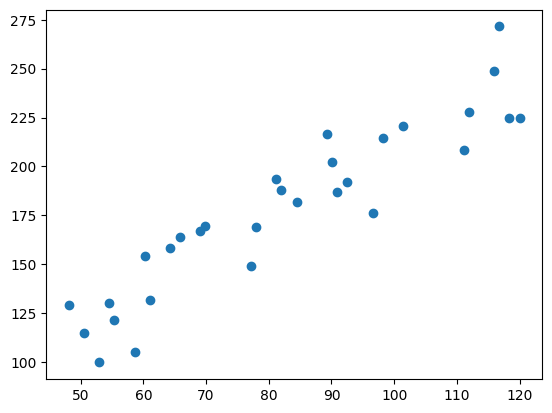

In [14]:
import matplotlib.pyplot as plt
TX, TY = next(iter(train_dataloader))
print(f"Feature batch shape: {TX.size()}")
print(f"Labels batch shape: {TY.size()}")
plt.scatter(TX,TY)